In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\Sanchit Dakle\OneDrive\Desktop\Excelar\ToyotaCorolla - MLR.csv")

In [3]:
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [4]:
# summmary of data
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


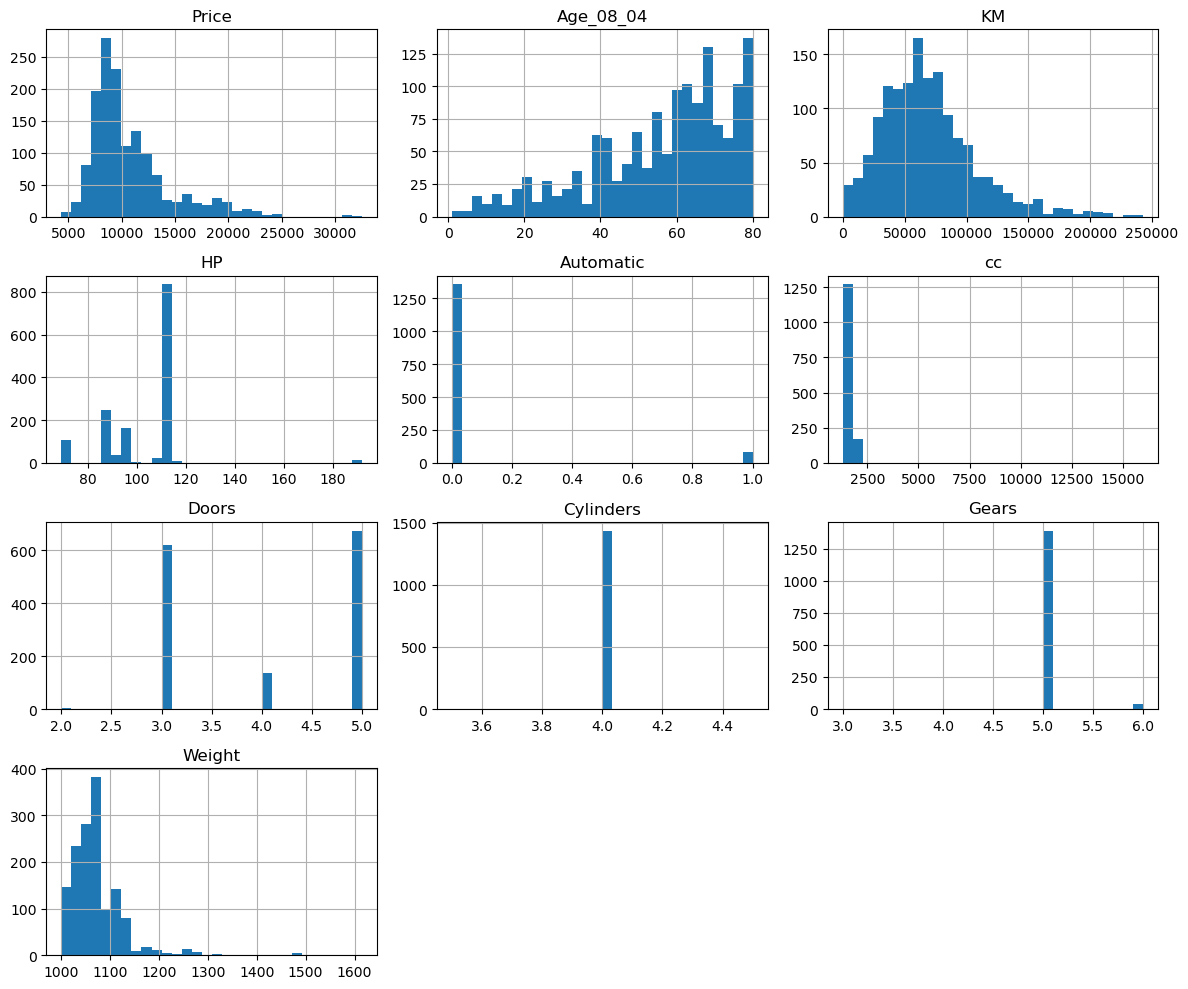

In [5]:
# visulization of data
data.hist(bins=(30), figsize=(12, 10))
plt.tight_layout()
plt.show()

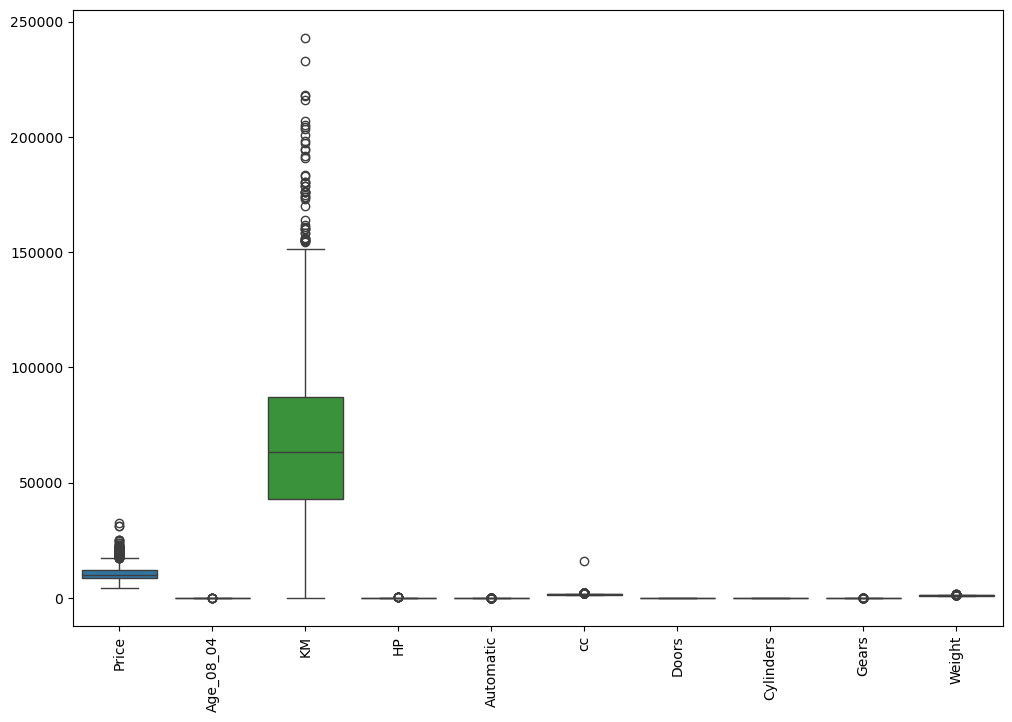

In [6]:
# Boxplot for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

In [7]:
correlation=data.corr(numeric_only=True)

In [8]:
correlation

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000


<Axes: >

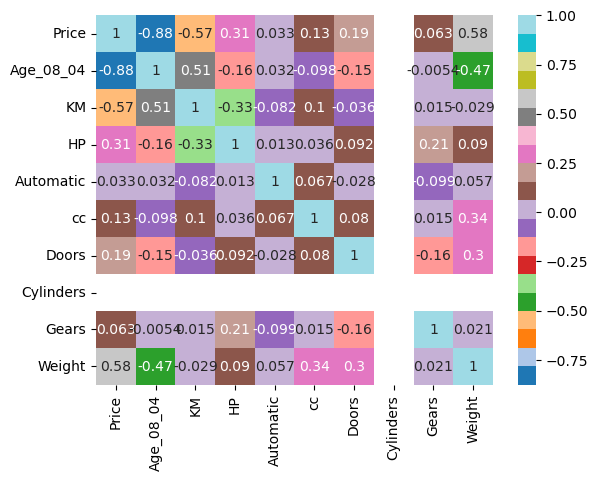

In [9]:
sns.heatmap(correlation,annot=True,cmap='tab20')

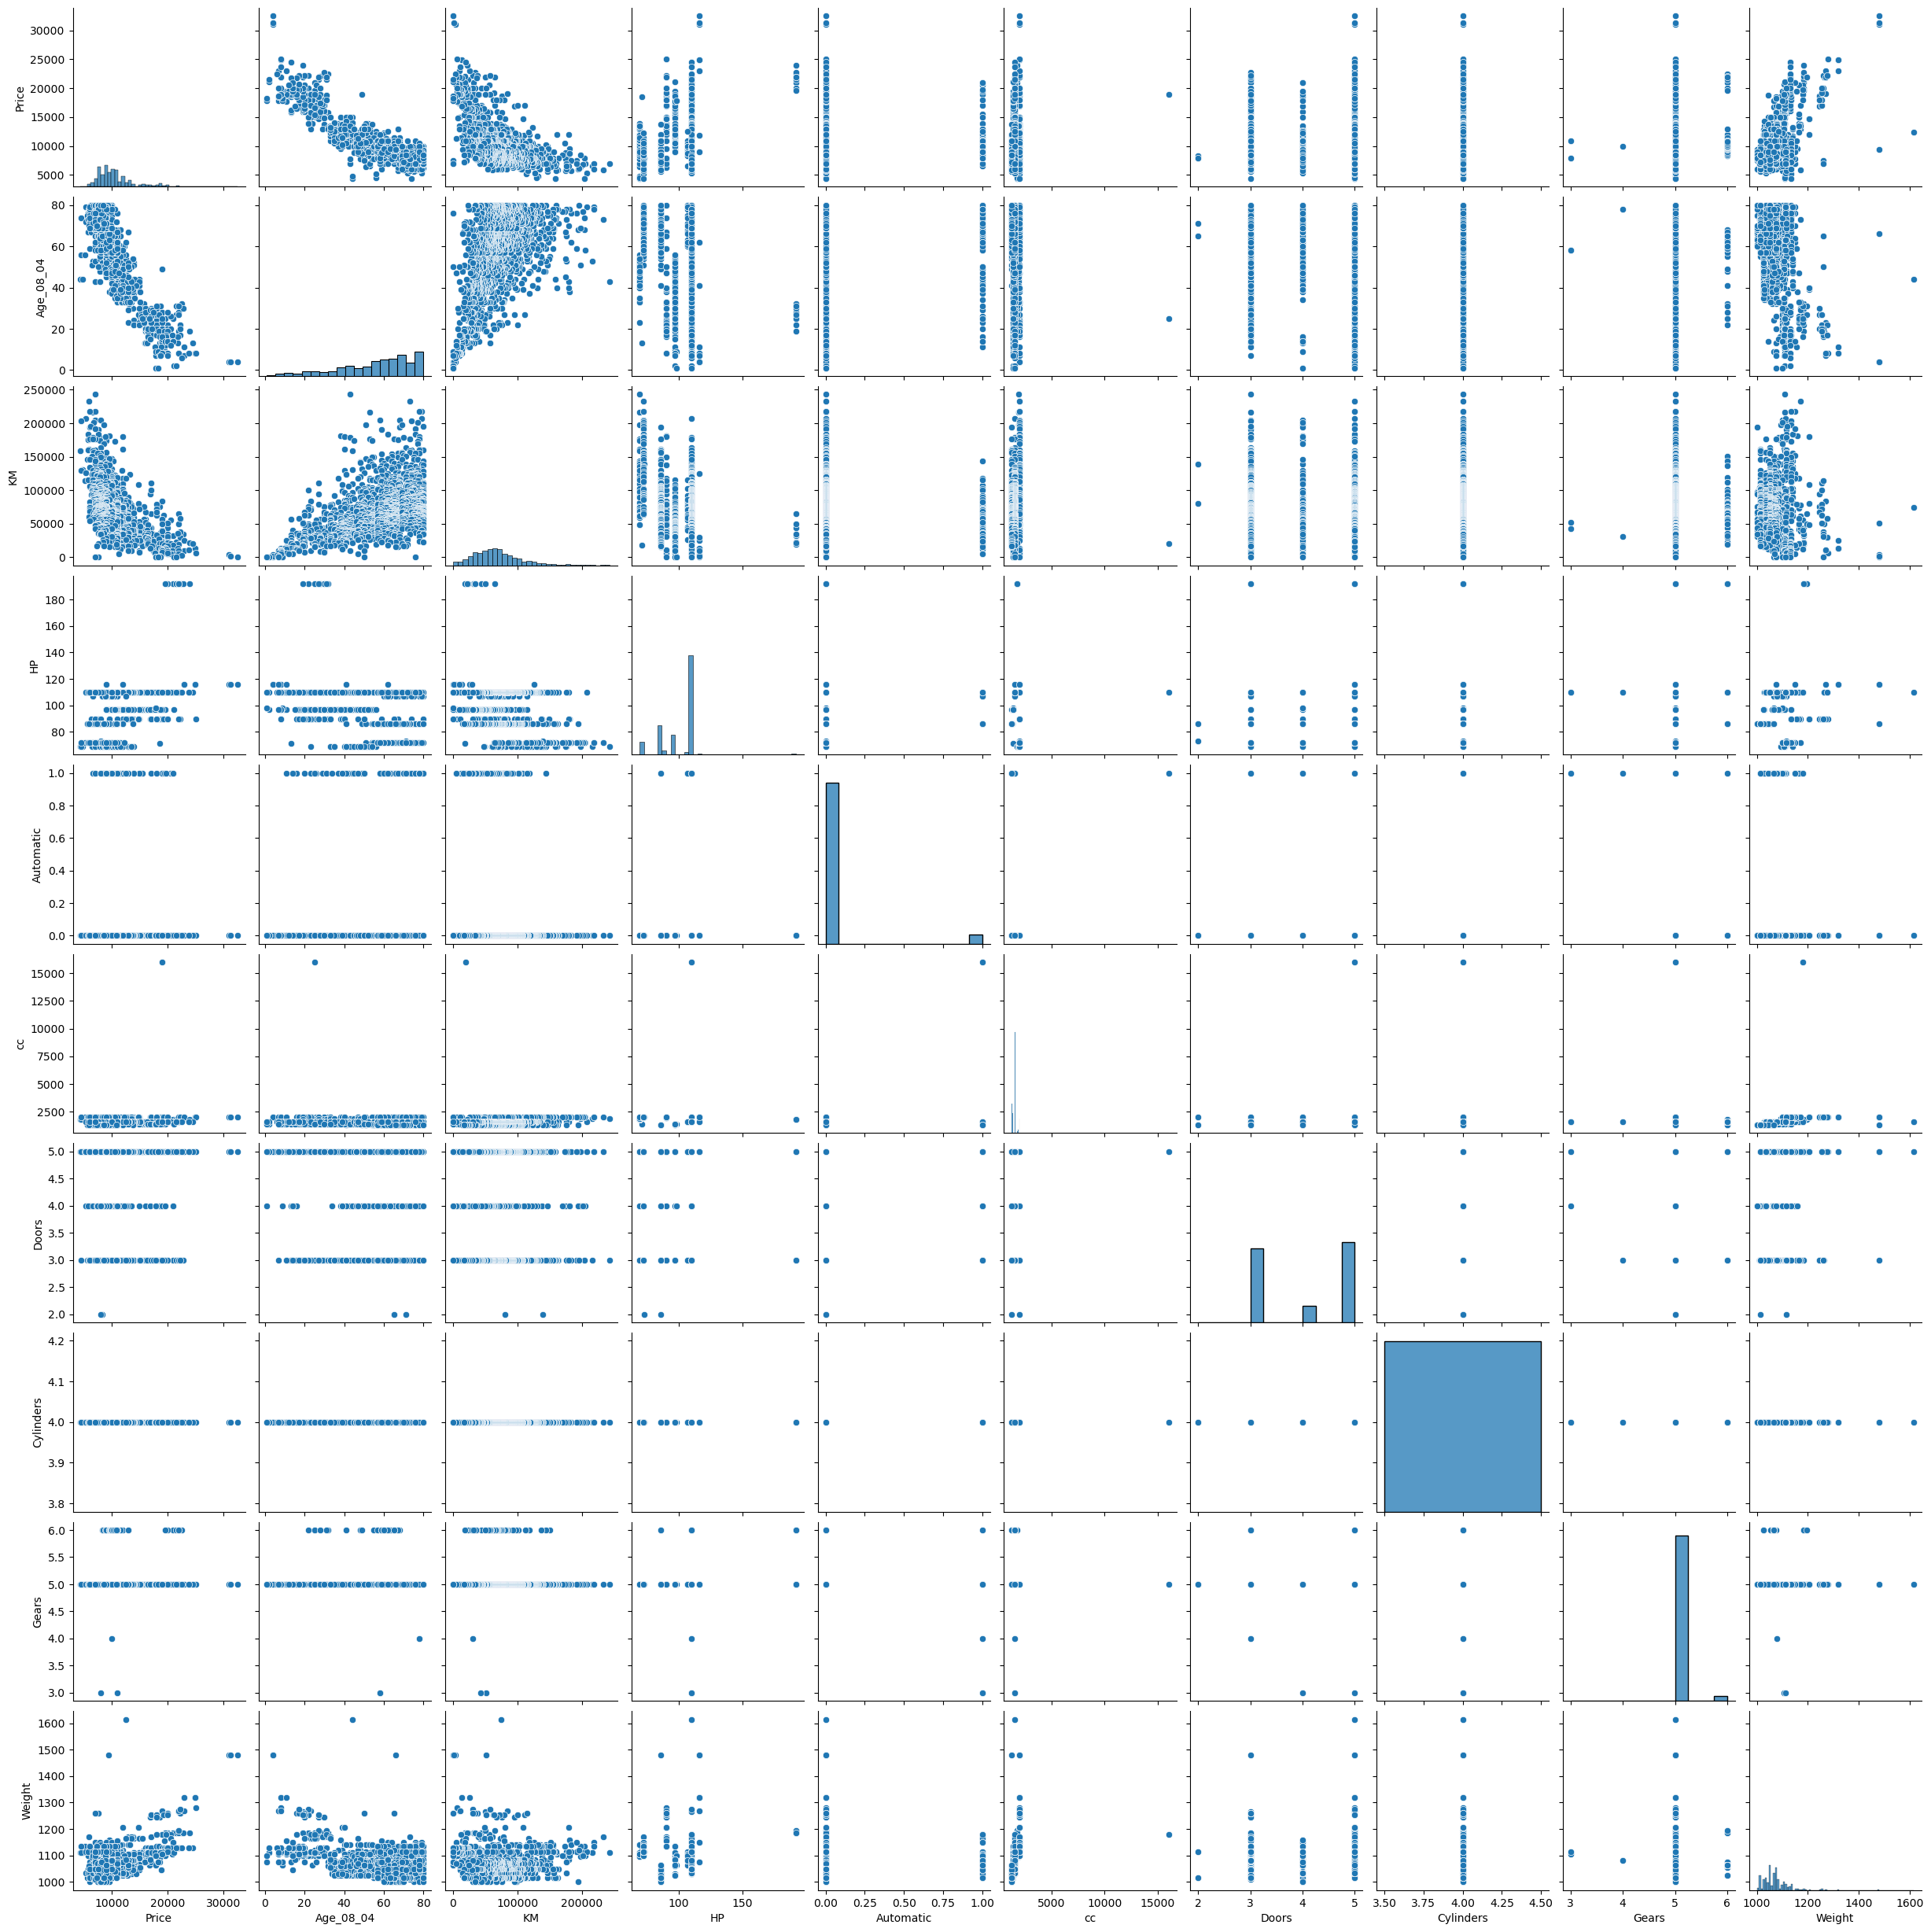

In [10]:
sns.pairplot(data)

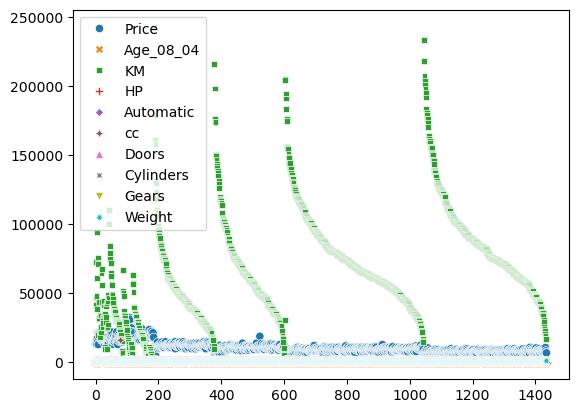

In [11]:
sns.scatterplot(data=data)
plt.show()

# Split dataset training and testing

In [13]:
# split data into training and testing
from sklearn.model_selection import train_test_split
# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['Fuel_Type'], drop_first=True)

In [14]:
x=data.drop('Price',axis=1)
y=data['Price']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1148, 11), (288, 11), (1148,), (288,))

# 3. Build Multiple Linear Regression Models

In [18]:
from sklearn.linear_model import LinearRegression


In [19]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [20]:
# Initialize and fit the model
model1 = LinearRegression()
model1.fit(x_train, y_train)

# Coefficients and intercept
print("Model 1 Coefficients:", model1.coef_)
print("Model 1 Intercept:", model1.intercept_)


Model 1 Coefficients: [-1.20830458e+02 -1.62314106e-02  1.40394788e+01  1.48830927e+02
 -3.03721946e-02 -6.03109744e+01  3.69482223e-13  5.51600710e+02
  2.58849583e+01 -6.85487568e+01  1.37080891e+03]
Model 1 Intercept: -14255.38599356528


In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer 

In [22]:
# Convert x_train back to DataFrame
x_train = pd.DataFrame(x_train)

if 'Fuel_Type' in x_train.columns:
    enc = OneHotEncoder(handle_unknown='ignore')
    #Fit on the original x_train to avoid altering the number of samples
    enc.fit(x_train[['Fuel_Type']])
    num_cat_features = enc.transform(x_train[['Fuel_Type']]).toarray()

    # Create a new DataFrame with the one-hot encoded features
    num_cat_features = pd.DataFrame(num_cat_features, index=x_train.index) # Use the same index as x_train
    x_train = x_train.drop('Fuel_Type', axis=1) # Remove original string column
    #Use the original x_train index to avoid misalignment
    x_train = pd.concat([x_train,  num_cat_features], axis=1)
    
# Convert all column names to strings
x_train.columns = x_train.columns.astype(str) 
# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean') 
#Use the original x_train index to avoid misalignment
x_train[:] = imputer.fit_transform(x_train) 

# Now you can fit the model
model = LinearRegression()

# Ensure x_train and y_train have the same number of samples before fitting
if x_train.shape[0] != y_train.shape[0]:
    # Identify the common indices between x_train and y_train
    common_index = x_train.index.intersection(y_train.index)
    
    # Align x_train and y_train based on the common indices
    x_train = x_train.loc[common_index]
    y_train = y_train.loc[common_index]

#Check shapes of x_train and y_train and ensure they have the same number of samples
print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
model.fit(x_train, y_train)

Shape of x_train: (1148, 11)
Shape of y_train: (1148,)


C:\Users\Sanchit Dakle\AppData\Local\Temp\ipykernel_5520\2261629484.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  x_train[:] = imputer.fit_transform(x_train)
C:\Users\Sanchit Dakle\AppData\Local\Temp\ipykernel_5520\2261629484.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1. 1. 1. ... 1. 1. 1.]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  x_train[:] = imputer.fit_transform(x_train)


LinearRegression()

In [23]:
# Assuming 'Fuel_Type' is a categorical column in x_test
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd 

if 'Fuel_Type' in x_test.columns:
    # Apply the same one-hot encoding as you did for x_train
    num_cat_features = enc.transform(x_test[['Fuel_Type']]).toarray()
    
    # Create a new DataFrame with the one-hot encoded features
    # Use the same index as x_test
    num_cat_features = pd.DataFrame(num_cat_features, index = x_test.index) 
    
    x_test = x_test.drop('Fuel_Type', axis=1)
    # Use the same index as x_test to avoid misalignment
    x_test = pd.concat([x_test, num_cat_features], axis=1)

# Convert column names to strings (if necessary)
x_test.columns = x_test.columns.astype(str)
missing_cols = set(x_train.columns) - set(x_test.columns)
for col in missing_cols:
    x_test[col] = 0  

# Reorder columns to match the order in x_train
x_test = x_test[x_train.columns]

# Impute missing values using the same imputer used for x_train
x_test[:] = imputer.transform(x_test)

# Check if the number of samples in x_test and y_test match
if x_test.shape[0] != y_test.shape[0]:
    # Identify the common indices between x_test and y_test
    common_index = x_test.index.intersection(y_test.index)
    # Align x_test and y_test based on the common indices
    x_test = x_test.loc[common_index]
    y_test = y_test.loc[common_index]

C:\Users\Sanchit Dakle\AppData\Local\Temp\ipykernel_5520\1429496036.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 

In [24]:
# Now you should be able to predict
y_pred = model.predict(x_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

R2 Score: 0.8348888040611082
MSE: 2203043.8231437025


# 4. Evaluate Performance

In [26]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error

print('R2 Score:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.8348888040611082
MSE: 2203043.8231437025
MAE: 990.8872739193927


# 5. Apply Lasso and Ridge Methods


In [28]:
from sklearn.linear_model import Lasso, Ridge
# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
print('Lasso R2:', r2_score(y_test, y_pred_lasso))
# Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
print('Ridge R2:', r2_score(y_test, y_pred_ridge))

Lasso R2: 0.8349467801805
Ridge R2: 0.8349121559240098
